# COGS 108 - Final Project 

# Overview

*Fill in your overview here*



# Names

- Alisha Sehgal
- Austin Clark
- Peter Xu
- Richard Du


# Group Members IDs

- A15592727
- A91063616
- A15206122
- A92152605

# Research Question

Do the college degrees that cost more pay back proportionality more after after graduation and mid-career? Do the statistics on majors vary based on public or private schools? Lastly, does the region of the college affect the payout?

The problem we are investigating is the cost increases of higher education and its relationship to the salaries from the obtained degrees. With the cost of obtaining a bachelor’s degree, is it really worth it to pursue a certain level of education? Also, are the majors that are usually viewed as those low-earning worth to pursue with a college degree? For the project, we try to answer the question of 1. What type/category of majors and degrees cost you the most, and 2. Do these combinations also make you more money in the long run compared to other less expensive majors/ degrees? 3. Does the school region and type of school have an effect on the starting and mid-career salaries of graduates?

## Background and Prior Work

There is a large difference between college completion of high and low income families and between completion of college for females and males. In the NBER working papers, college completion is measured by people who attain a bachelor’s degree by the time they are 25. Over the years, there has been an increase in the completion of college for females, but this increase is driven by the daughters of high income families, and does not account for females in low-income families. Between 1915 and 1983, college completion quadrupled. Again, most of this increase is accounted for by high-income families. This begs the question, is the price of college too high for the regular household?

Upon looking at another article about the worth of college, our group found that debt for college has become a large sum that often hinders students from living out their dreams. In fact, between 2010 and 2011, half of all of the college graduates were unemployed or employed below their skill level. If college isn’t getting students closer to what they want, then is it worth it? The article clarifies that for certain majors such as engineering or medical majors, college is necessary. It also singles out certain colleges, like Stanford, as being more worth it than others. However, overall, the book states that college is not necessary if one does not have a clear reason for going. Most people can go to the library and learn for themselves what their $100 grand plus would get them in college. To support this claim, the author states that 84% of employers have rated college graduates as not fully prepared for the workforce and only a little bit more prepared than a high school graduate.

College costs have been rising at a rate above the rate of inflation. They will continue to follow this trend and students will become more and more crippled by debt for the same education. Additionally, more students are being enrolled in universities, thus creating a more people competing for the same amount of resources scenario at nearly all public and state colleges. The large difference in lifetime earnings between those with and without college degrees is largely due to what those who graduate from the top 150 colleges earn. Students from the average college do not have a large difference between their lifetime earnings after subtracting debt when compared to a high school graduate with no debt.

The value of education has always been a topic of discussion, but in recent years it has become more of a concern. Lots of data about such topics exist online. For example, Bureau of Labor Statistics, Kaggle, Payscale. Most people will complete a bachelor’s degree after 4 years of college. However, depending on which college you attend, the cost of a bachelor’s degree can vary significantly. By default, private universities cost more to attend compared to public universities, which may put more pressure on students to select the best major to make up for the cost. However, as noted in the analysis from College Earnings Premium & Value Proposition, if financial aid is included, the cost for attending private colleges becomes more comparable to the cost of public colleges.

The type of major you select also can have a significant impact on your salary after you complete your degree. The analysis from the project Post-College Salaries Exploration in R, shows that STEM majors have an advantage when it comes to starting salaries and mid-career salaries. However, since we are looking at the proportional net gain from cost of attendance to salary, we cannot simply look at the top paying majors. Further analysis in the same project describes the growth in long-term salary for the various majors. In this case, engineering majors showed less growth compared to other majors such as economics, political science, finance, etc. While we do have to take into consideration the higher starting salary for engineering majors, the difference in growth potential suggests that non STEM majors may be worth considering when examining the net proportional gain after earning the degree.

References:

1) https://www.nber.org/papers/w17633chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://www.nber.org/papers/w17633.pdf
2) https://books.google.com/books?hl=en&lr=&id=AZ9aFGUH-t0C&oi=fnd&pg=PP2&dq=college+worth&ots=hzE60fcciL&sig=uuG_lMudxmeBP2BKrqljSCi9bzU#v=onepage&q=college%20worth&f=false
3) https://www.kaggle.com/apollostar/college-earnings-premium-value-proposition
4) https://www.kaggle.com/cbhyphen/post-college-salaries-exploration-in-r

# Hypothesis


We expect that on average, degrees that require more time will have a better payoff in the long run due to the additional knowledge and skills gained from the additional education. However, there may be certain degrees, where having more industry experience will be better, and thus be proportionally more cost efficient.

Additionally, we propose that the region of the school does affect the payout. Schools in certain regions are more primed for certain majors to prosper after graduation due to opportunity and resources.

# Dataset(s)

*Fill in your dataset information here*

- Dataset Name: College Scorecard
- Link to the dataset: https://collegescorecard.ed.gov/data/
- Number of observations: 7804 (for the 2013-2014 data set)

This dataset is from the US Department of Education and it matches information from student financial aid with federal tax returns. This dataset was created with the intention of providing some insight into the difference in rankings of Universities. 
There are over 6000 observations in this dataset which records the university a student attended with information on how much the average student makes and how expensive the schooling was. 

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns
sns.set()
sns.set_context('talk')
from statsmodels.formula.api import ols

# Data Cleaning

First we want to import and clean the College Score Card 2014 Dataset

In [2]:
df = pd.read_csv('MERGED2013_14_PP.csv', dtype = str)

Note that this dataset is enormous and has over 1000 columns of variables so we need to select only the cells that we can use.

In [3]:
# setting up columns we want to look at
institution_name = 'INSTNM' #string
state = 'STABBR' #string
undergraduate_enrollment = 'UGDS' #int
avg_cost_of_attendance_academic_institutions = 'COSTT4_A' #int

# ownership specifies if college is private or public; key: 1 = public, 2 = private nonprofit, 3 = private for profit
ownership = "CONTROL" #int

# wne = 'working not enrolled'
count_of_students_wne_10y_after_entry = 'COUNT_WNE_P10' #int
mean_earnings_of_students_wne_10y_after_entry = 'MN_EARN_WNE_P10' #int
median_earnings_of_students_wne_10y_after_entry = 'MD_EARN_WNE_P10' #int
stddev_earnings_of_students_wne_10y_after_entry = 'SD_EARN_WNE_P10' #int

count_of_students_wne_6y_after_entry = 'COUNT_WNE_P6' #int
mean_earnings_of_students_wne_6y_after_entry = 'MN_EARN_WNE_P6' #int
median_earnings_of_students_wne_6y_after_entry = 'MD_EARN_WNE_P6' #int
stddev_earnings_of_students_wne_6y_after_entry = 'SD_EARN_WNE_P6' #int

median_debt_for_graduated_students = 'GRAD_DEBT_MDN' #float

relevantColumns = [institution_name,
                   state,
                   ownership, 
                   undergraduate_enrollment, 
                   avg_cost_of_attendance_academic_institutions, 
                  count_of_students_wne_10y_after_entry,
                  mean_earnings_of_students_wne_10y_after_entry,
                  median_earnings_of_students_wne_10y_after_entry,
                  stddev_earnings_of_students_wne_10y_after_entry,
                  count_of_students_wne_6y_after_entry,
                  mean_earnings_of_students_wne_6y_after_entry,
                  median_earnings_of_students_wne_6y_after_entry,
                  stddev_earnings_of_students_wne_6y_after_entry,
                  median_debt_for_graduated_students,
                  percent_degrees_in_engineering]


Now we have a manageable dataset with usefull information for the questions we are trying to answer.

When we started looking further into the dataset we see that this includes information for not only traditional colleges, but also information for trade schools and small institutions classified as higher learning. We removed the small schools and trade schools by removing all schools whose attendance was less than 2000 as well as removing the schools that had missing information. 

In [4]:
# remove all other column data
df = df.loc[:, df.columns.intersection(relevantColumns)]

# remove specialized program institutions from the dataframe (they will have NaN for academic institution cost of attendance)
#df = df.dropna(subset=[avg_cost_of_attendance_academic_institutions])

# remove all rows that have null
df = df.dropna(how='any')

# update type for int columns
for col in relevantColumns[2:-2]:
    if(df[col].dtype == object):
        # remove rows with 'PrivacySuppressed'
        df = df[df[col]!='PrivacySuppressed']
        df[col] = df[col].astype('int')

# update type for float columns
for col in relevantColumns[-2:]:
    if(df[col].dtype == object):
        # remove rows with 'PrivacySuppressed'
        df = df[df[col]!='PrivacySuppressed']
        df[col] = df[col].astype('float')

# remove schools with less than 2000 undergraduate students enrolled
df[undergraduate_enrollment] = df[undergraduate_enrollment].astype('int')
df = df[df[undergraduate_enrollment] >= 2000]


We are left with a dataset that has 1588 entries that we can make inferences from.

In [5]:
df.head()

,INSTNM,STABBR,PCIP15,UGDS,COSTT4_A,GRAD_DEBT_MDN,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,SD_EARN_WNE_P10,COUNT_WNE_P6,MN_EARN_WNE_P6,MD_EARN_WNE_P6,SD_EARN_WNE_P6
0,Alabama A & M University,AL,0.0348,4051,18888,29500.0,1741,34300,29900,25300,1187,27200,23100,24200
1,University of Alabama at Birmingham,AL,0.0000,11200,19990,20345.5,3474,46400,40200,36300,2665,38300,34000,29800
3,University of Alabama in Huntsville,AL,0.0000,5525,20306,22750.0,1361,50500,45600,32700,1258,39200,35500,25800
4,Alabama State University,AL,0.0000,5354,17400,31200.0,1977,29500,26700,20500,1594,23100,21000,15100
5,The University of Alabama,AL,0.0000,28692,26717,22910.0,3648,49900,42700,42600,4322,39000,34800,41800


### to do -- add analysis for college scorecard data -start section

In [1]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=mean_earnings_of_students_wne_10y_after_entry, ax=axes[0,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=median_earnings_of_students_wne_10y_after_entry, ax=axes[0,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=mean_earnings_of_students_wne_6y_after_entry, ax=axes[1,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=median_earnings_of_students_wne_6y_after_entry, ax=axes[1,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

# Add plot title for the entire subplot row
fig.text(0.5, 0.90, 'Student earnings data 10 years after entering college', ha='center', va='center', fontsize=20)
fig.text(0.5, 0.49, 'Student earnings data 6 years after entering college', ha='center', va='center', fontsize=20)

f1 = plt.gcf()

NameError: name 'plt' is not defined

In [ ]:
public_institutions = df[df[ownership] == 1]
private_institutions = df[df[ownership] != 1]
mean_public_10y = public_institutions[mean_earnings_of_students_wne_10y_after_entry].mean()
mean_private_10y = private_institutions[mean_earnings_of_students_wne_10y_after_entry].mean()

mean_public_6y = public_institutions[mean_earnings_of_students_wne_6y_after_entry].mean()
mean_private_6y = private_institutions[mean_earnings_of_students_wne_6y_after_entry].mean()

print(ttest_ind(public_institutions[mean_earnings_of_students_wne_10y_after_entry], private_institutions[mean_earnings_of_students_wne_10y_after_entry]))
print(ttest_ind(public_institutions[mean_earnings_of_students_wne_6y_after_entry], private_institutions[mean_earnings_of_students_wne_6y_after_entry] ))

In [ ]:
print('meanpublic_10y:',mean_public_10y)
print('meanprivate_10y:',mean_private_10y)

print('meanpublic_6y:',mean_public_6y)
print('meanprivate_6y:',mean_private_6y)


In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))
ax = public_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=mean_earnings_of_students_wne_10y_after_entry, ax=axes[0,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = public_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=median_earnings_of_students_wne_10y_after_entry, ax=axes[0,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

ax = private_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=mean_earnings_of_students_wne_10y_after_entry, ax=axes[1,0])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Mean earnings of students')
ax = private_institutions.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=median_earnings_of_students_wne_10y_after_entry, ax=axes[1,1])
ax.set_xlabel('Cost for Attendance')
ax.set_ylabel('Median earnings of students')

# Add plot title for the entire subplot row
fig.text(0.5, 0.90, 'Student earnings data for public institutions', ha='center', va='center', fontsize=20)
fig.text(0.5, 0.49, 'Student earnings data for private institutions', ha='center', va='center', fontsize=20)

f2 = plt.gcf()

In [ ]:
md_earning6 = df['MD_EARN_WNE_P6'].mean()
avg_earning6 = df['MN_EARN_WNE_P6'].mean()
avg_cost = df['COSTT4_A'].mean()

cost_leaving = 4*avg_cost
md_dbt_leaving = df['GRAD_DEBT_MDN'].mean()
#Plotting with interest
y = [0]*8
y[0]= md_dbt_leaving
for i in range(1,8):
    y[i]= y[i-1]*(1.055)-.10*(md_earning6)
    

#without interest the years to recoup investement
yrs_in= cost_leaving/md_earning6
#This is about 3


In [ ]:
yf = pd.DataFrame(y)
yf.plot(title= 'Debt after college paying 10% salary a year')
plt.xlabel('Years after graduation')
plt.ylabel('Debt in Dollars')

In [ ]:
sns.set(rc={'figure.figsize':(19,9)})
sns.violinplot(x= df["STABBR"],y=df["MN_EARN_WNE_P6"])

### to do -- add analysis for college scorecard data - end section

Next we want to look at the dataset that has information on colleges based on college type and region.

In [6]:
degrees_that_pay_back = pd.read_csv('degrees-that-pay-back.csv')
salaries_by_college_type = pd.read_csv('salaries-by-college-type.csv')
salaries_by_region = pd.read_csv ('salaries-by-region.csv')

We want to merge these 3 datasets and drop the information we wont be using. Also, our data was entered as strings with special characters so we need to change that information to float integer.

In [7]:
df_merge = pd.merge(salaries_by_college_type,salaries_by_region, on = 'School Name',how = 'left')
df_merge.drop(['Starting Median Salary_y','Mid-Career Median Salary_y','Mid-Career 10th Percentile Salary_y',
        'Mid-Career 25th Percentile Salary_y','Mid-Career 75th Percentile Salary_y',
        'Mid-Career 90th Percentile Salary_y'],axis = 1,inplace = True) 
df_merge.columns = ['School_Name','School_Type','Starting_Median_Salary','Mid_Career_Median_Salary',
             'Mid_Career_10th_Percentile_Salary','Mid_Career_25th_Percentile_Salary',
             'Mid_Career_75th_Percentile_Salary','Mid_Career_90th_Percentile_Salary','Region']

df_merge.drop(['Mid_Career_10th_Percentile_Salary','Mid_Career_90th_Percentile_Salary'],axis = 1, inplace = True)

df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].str.replace('$','')
df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].str.replace(',','')
df_merge['Starting_Median_Salary']= df_merge['Starting_Median_Salary'].replace('.00','')
df_merge['Starting_Median_Salary'] = df_merge['Starting_Median_Salary'].astype(float)

df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].str.replace('$','')
df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].str.replace(',','')
df_merge['Mid_Career_Median_Salary']= df_merge['Mid_Career_Median_Salary'].replace('.00','')
df_merge['Mid_Career_Median_Salary'] = df_merge['Mid_Career_Median_Salary'].astype(float)

df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].str.replace('$','')
df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].str.replace(',','')
df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].replace('.00','')
df_merge['Mid_Career_25th_Percentile_Salary'] = df_merge['Mid_Career_25th_Percentile_Salary'].astype(float)

df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].str.replace('$','')
df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].str.replace(',','')
df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].replace('.00','')
df_merge['Mid_Career_75th_Percentile_Salary'] = df_merge['Mid_Career_75th_Percentile_Salary'].astype(float)

In [8]:
df_merge.head()

,School_Name,School_Type,Starting_Median_Salary,Mid_Career_Median_Salary,Mid_Career_25th_Percentile_Salary,Mid_Career_75th_Percentile_Salary,Region
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,99200.0,168000.0,Northeastern
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,104000.0,161000.0,California
2,Harvey Mudd College,Engineering,71800.0,122000.0,96000.0,180000.0,California
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,94300.0,143000.0,Northeastern
4,Cooper Union,Engineering,62200.0,114000.0,80200.0,142000.0,Northeastern


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

  We will start by looking at the merged data about college type and region.

We were curious as to the difference in the median starting and mid career salaries for graduates of the different categories for schools. Intuitively we assume that Ivy League and Engineering schools are going to have a higher payoff but we need to see if our data supports that.

In [26]:
ME=df_merge.loc[df_merge['School_Type']=="Engineering"].mean()
PP=df_merge.loc[df_merge['School_Type']=="Party"].mean()
LAM=df_merge.loc[df_merge['School_Type']=="Liberal Arts"].mean()
ILM=df_merge.loc[df_merge['School_Type']=="Ivy League"].mean()
SM=df_merge.loc[df_merge['School_Type']=="State"].mean()

In [32]:
salary = {'1':["Engineering",59057.894737,103842.105263],'2':["Party",45715.0,84685.0],
          '3':["Liberal Arts",45746.808511,89378.723404],'4':["Ivy",60475.0,120125.0],
          '5':["State",44126.285714,78567.428571]}
Salary = pd.DataFrame.from_dict(salary,orient = 'index',columns=['School_Type','Avg_starting_median',
                                                                 'Avg_mid_career_median'])
Salary

,School_Type,Avg_starting_median,Avg_mid_career_median
1,Engineering,59057.894737,103842.105263
2,Party,45715.000000,84685.000000
3,Liberal Arts,45746.808511,89378.723404
4,Ivy,60475.000000,120125.000000
5,State,44126.285714,78567.428571


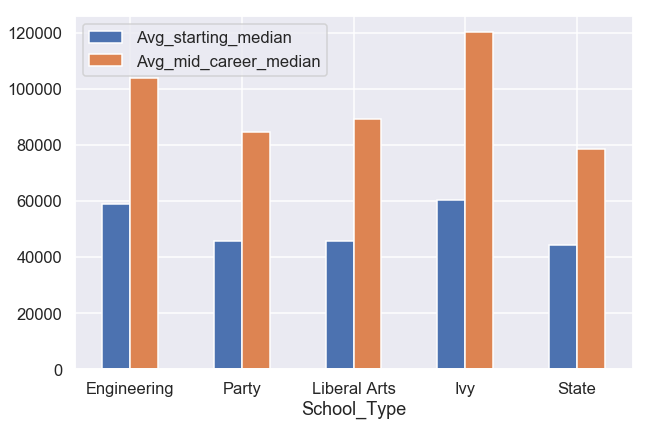

In [33]:
Salary.plot.bar(x = 'School_Type',figsize = (10,6.5),rot = 0)

From this bar plot it looks like Party, Liberal arts, and State schools have lower starting and mid career salaries than that of Engineering and Ivy League. 

In order to see if this difference is statistically significant we decided to run an ANOVA test for the difference in average salary for the different school types.
We tested-  
H0: The mean starting salary is the same for all school types. V.S.
H1: The mean starting salary is not the same for all school types.

In [40]:
mod1 = ols('Starting_Median_Salary ~ School_Type',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod1,type=2)
print(anova_table)

                df        sum_sq       mean_sq          F        PR(>F)
School_Type    4.0  5.533638e+09  1.383410e+09  66.561438  7.056857e-39
Residual     264.0  5.486963e+09  2.078395e+07        NaN           NaN


We have a very low p-value therefore we reject the null hypothesis in favor of the alternative and conclude that there is statistical evidence that the starting salary is affected by the type of school attended. Now we will look at the mid career median assumin ghte same null and alternative hypothesis.

In [41]:
mod2 = ols('Mid_Career_Median_Salary ~ School_Type',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod2,type=2)
print(anova_table)

                df        sum_sq       mean_sq          F        PR(>F)
School_Type    4.0  2.445324e+10  6.113310e+09  52.694356  1.349855e-32
Residual     264.0  3.062783e+10  1.160145e+08        NaN           NaN


Again we have a very low p-value so we arrive at the same conclusion as for the starting median salary.

Now we want to look at how the salaries are different between the regions the schools are located in.

In [38]:
RN=df_merge.loc[df_merge['Region']=="Northeastern"].mean()
RC=df_merge.loc[df_merge['Region']=="California"].mean()
RS=df_merge.loc[df_merge['Region']=="Southern"].mean()
RW=df_merge.loc[df_merge['Region']=="Western"].mean()
RM=df_merge.loc[df_merge['Region']=="Midwestern"].mean()
region = {'1':["Northeastern",49267.142857,93518.571429],'2':["California",50155.555556,91633.333333],
         '3':["Southern", 44288.235294,80302.941176],'4':["Western",44151.282051,78135.897436],
         '5':["Midwestern",43801.5625,77637.5000]}
Region = pd.DataFrame.from_dict(region,orient = 'index',columns=['Region','Avg_starting_median',
                                                                 'Avg_mid_career_median'])
Region

,Region,Avg_starting_median,Avg_mid_career_median
1,Northeastern,49267.142857,93518.571429
2,California,50155.555556,91633.333333
3,Southern,44288.235294,80302.941176
4,Western,44151.282051,78135.897436
5,Midwestern,43801.562500,77637.500000


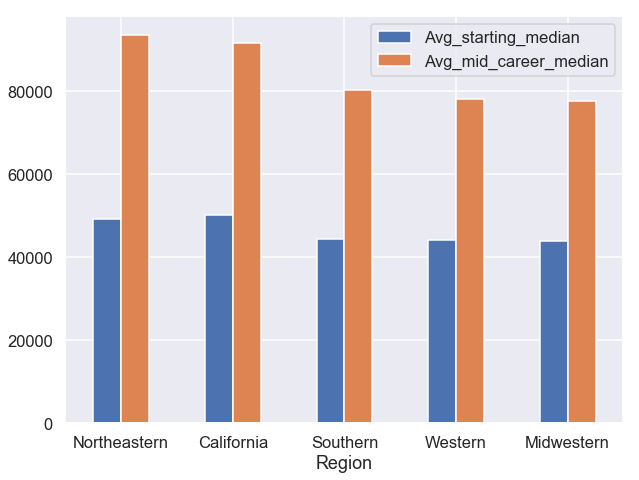

In [39]:
Region.plot.bar(x = 'Region',figsize = (10,7.5),rot = 0)

Again both the starting and mid career salaries appear to be different so we want to test to see if the difference is statistically significant. We proceed with ANOVA testing for- H0: The average salary is the same for all regions.
V.S.
H1: the starting salary is not the same for all regions.

In [42]:
mod3 = ols('Starting_Median_Salary ~ Region',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod3,type=2)
print(anova_table)

             df        sum_sq       mean_sq         F        PR(>F)
Region      4.0  1.854800e+09  4.637001e+08  13.36962  6.234456e-10
Residual  263.0  9.121659e+09  3.468311e+07       NaN           NaN


In [43]:
mod4 = ols('Mid_Career_Median_Salary ~ Region',data=df_merge).fit()
anova_table = sm.stats.anova_lm(mod4,type=2)
print(anova_table)

             df        sum_sq       mean_sq          F        PR(>F)
Region      4.0  1.277600e+10  3.193999e+09  19.861213  2.654115e-14
Residual  263.0  4.229459e+10  1.608159e+08        NaN           NaN


The p-value is very low for both mid career and starting salaries so we conclude that the region that the school is located in does in fact affect the salary for the graduate.

In [18]:
df_merge['value_growth'] = df_merge['Mid_Career_Median_Salary'] - df_merge['Starting_Median_Salary']
RN=df_merge.loc[df_merge['Region']=="Northeastern"].mean()
RC=df_merge.loc[df_merge['Region']=="California"].mean()
RS=df_merge.loc[df_merge['Region']=="Southern"].mean()
RW=df_merge.loc[df_merge['Region']=="Western"].mean()
RM=df_merge.loc[df_merge['Region']=="Midwestern"].mean()

In [20]:
value_growth = {'1':["Northeastern",44251.428571],'2':["California",41477.777778],
          '3':["Southern",36014.705882],'4':["Western",33984.615385],
          '5':["Midwestern",33835.937500]}
Value_growth = pd.DataFrame.from_dict(value_growth,orient = 'index',columns=['Region','Avg_value_growth'])

In [21]:
Value_growth

,Region,Avg_value_growth
1,Northeastern,44251.428571
2,California,41477.777778
3,Southern,36014.705882
4,Western,33984.615385
5,Midwestern,33835.937500


In [14]:
df_merge['percent_growth'] = (df_merge['Mid_Career_Median_Salary'] - df_merge['Starting_Median_Salary']) / df_merge['Starting_Median_Salary']
PEm=df_merge.loc[df_merge['School_Type']=="Engineering"].mean()
PPm=df_merge.loc[df_merge['School_Type']=="Party"].mean()
PLAm=df_merge.loc[df_merge['School_Type']=="Liberal Arts"].mean()
PILm=df_merge.loc[df_merge['School_Type']=="Ivy League"].mean()
PSm=df_merge.loc[df_merge['School_Type']=="State"].mean()

In [15]:
percent_growth = {'1':["Engineering",0.759268*100],'2':["Party",0.85388*100],
          '3':["Liberal Arts", 0.949769*100],'4':["Ivy",0.987949*100],
          '5':["State",0.777584*100]}
Percent_growth = pd.DataFrame.from_dict(percent_growth,orient = 'index',columns=['School_Type','Avg_percent_growth'])
Percent_growth

,School_Type,Avg_percent_growth
1,Engineering,75.9268
2,Party,85.3880
3,Liberal Arts,94.9769
4,Ivy,98.7949
5,State,77.7584


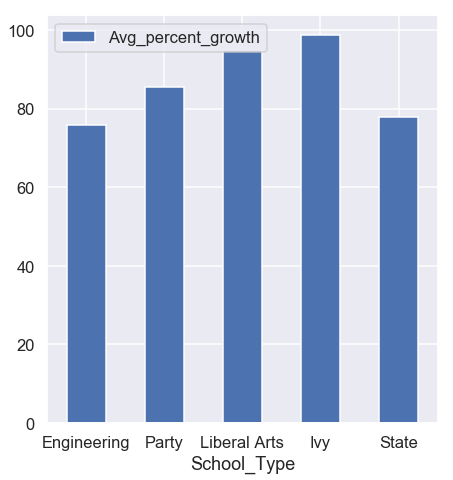

In [17]:
Percent_growth.plot.bar(x = 'School_Type',figsize = (7,7.5),rot = 0)

# Ethics & Privacy

The costs of schooling have been rising recently and we want people to be the most informed as to whether the cost of schooling is worth the money based on the expected payoff of their chosen major. We do not intend to discourage people from attending college or pursuing their passions and if our data ends up showing that certain areas or degrees are not profitable we hope that it does not have a large impact on the people who chose that area of study.

Throughout the collection of data, we hoped to show exactly how prices of colleges have risen and how the salaries out of college compare to the increase of cost for attendance. Is it ethical for colleges to continue charging students this much especially if they do not proportionally increase their resources to match the increase in students attending? If they are taking in more resources and money per student, where is the extra money going, if not towards the students?

We obtained our data from different datasets. Our primary dataset is the U.S. Department of Education College Scorecard Database. This source is widely known and regulated and thus proposes minimal risks in terms of bias. Our other dataset is from the Wall Street Journal which proposes minimal risk as well. Although, the sources are well-known and risks seems minimal, without knowing exactly how the data was collected, we cannot claim that the data is unbiased. In fact, being completely unbiased is not necessarily achievable. Instead, we have outlined the possible biases below so that viewers are aware of potential biases as they view the analysiswe have performed.

Our data is biased towards larger schools and schools that supply four year degrees. This is due to selection bias; we chose schools with populations that met a certain threshold and offered specific degrees. Our results do not account for those with less than 2000 students or trade schools. Thus, our conclusions cannot be held as accurate for any type of higher education. We also removed schools that had missing or withheld information, therefore closing in our sample to schools that were more well-known or more accessible.

Thus, our analysis includes what we and the datasets we collected from deem as elite institutions or institutions that are more commmonly discussed. The exact characteristics of elite institutions in the U.S. is unclear and thus poses a limitation towards what schools this analysis can apply to.

After analysis, our compiled data analysis is available to the public on github. All data used in this project is open source and does not include personal details of individuals. This it does not raise any ethical concerns. All analysis on the data is being done for educational purposes and to raise awareness. The project is not being used for personal gain; it is merely informative for the public.

As specified above, the data and analysis is done only for institutions in the U.S. Other countries may be able to use our analysis as a template, however, the analysis cannot be applied to the state ofhigher education in other parts of the world.

Our project does not specifically target any institutions and makes claim solely on the data. No outside information is excluded from the analysis provided.

Our results do represent what certain types of institutions as more advantageous. We do not mean to hinder attendance at other schools. We simply want to inform those looking to see what different categories of institutions provide. For instance, our results show that California schools tend to be better in the long run. However, our results do not state nor imply that schools outside California are incapable of providing good futures for their attendees.


# Conclusion & Discussion

*Fill in your discussion information here*